# PART 1

# DOMAIN: Electronics and Telecommunication

## CONTEXT:  A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters. 

## DATA DESCRIPTION: The data set contains information on various signal tests performed:

1. Parameters: Various measurable signal parameters.

2. Signal_Quality: Final signal strength or quality.

### PROJECT OBJECTIVE: 
The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

# Steps and tasks:

### Part 1. 1 a - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [152]:
import pandas as pd
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [153]:
signal_data = pd.read_csv("Part- 1 - Signal.csv")

In [154]:
signal_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [155]:
signal_data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Part 1.1 b - Check for missing values and print percentage for each attribute.

In [156]:
# Let's check for missing values in the data
round(signal_data.isnull().sum() / signal_data.isnull().count() * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [157]:
missing_values = ["n/a", "na", "--", " ","?","-"]
percent_missing = signal_data.isin(missing_values).sum()* 100 / len(signal_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


No missing Value in dataframe

### Part 1.1 c - Check for presence of duplicate records in the dataset and impute with appropriate method

In [158]:
# Let's check for duplicate values in the data
signal_data.duplicated().sum()

240

In [159]:
signal_data.shape

(1599, 12)

In [160]:
duplicate_df = signal_data[signal_data.duplicated()]
 
print("Duplicate Rows :")

duplicate_df

Duplicate Rows :


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [161]:
signal_data= signal_data.drop_duplicates()

In [162]:
print ("The shape of Total no of Duplicates in DataFrame ", duplicate_df.shape)
print ("The shape of data frame after removing Duplicates", signal_data.shape)


The shape of Total no of Duplicates in DataFrame  (240, 12)
The shape of data frame after removing Duplicates (1359, 12)


### Part 1.1 d- Visualise distribution of the target variable.

In [163]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [164]:
signal_data["Signal_Strength"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

<AxesSubplot:>

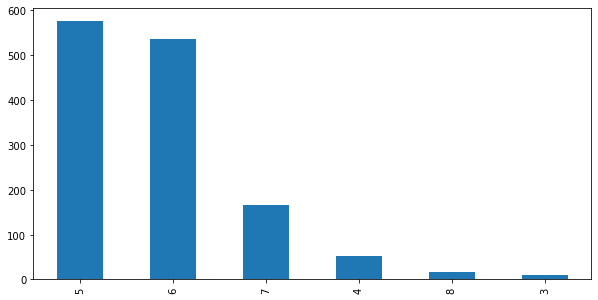

In [165]:
fig = plt.figure(figsize =(10, 5))
signal_data['Signal_Strength'].value_counts().plot.bar()

<AxesSubplot:ylabel='Signal_Strength'>

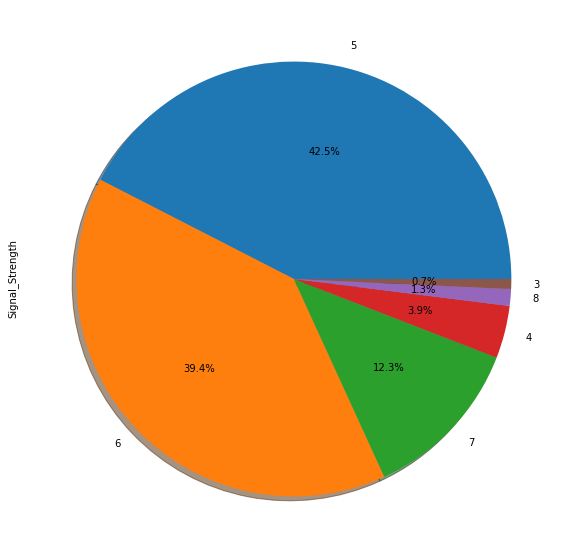

In [166]:
fig = plt.figure(figsize =(10, 10))
signal_data['Signal_Strength'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,)

### Part 1.1 e- - Share insights from the initial data analysis (at least 2).

In [167]:
signal_data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [168]:
signal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


1) Signals generated need to be normalized and scaled as they are in different range as well as you can observe parameters like 7 which is skewed too.

2) The Target variable signal ranges between 5-6 has captured almost 82% of data.

### Part 1.2 a - Split the data into X & Y..

In [169]:
import sklearn
from sklearn.model_selection import train_test_split

# Independent variables
X=signal_data.drop('Signal_Strength',axis=1)  

# Target variable
Y=signal_data['Signal_Strength']               



### Part 1.2 b - Split the data into train & test with 70:30 proportion.

In [170]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=42)

### Part 1.2 c - Print shape of all the 4 variables and verify if train and test data is in sync.

In [171]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


### Part 1.2 d - Normalise the train and test data with appropriate method..

In [172]:
from sklearn.preprocessing import StandardScaler

# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)     

### Part 1.2 e - Transform Labels into format acceptable by Neural Network

In [173]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test) 

### Part 1.3 a - Design a Neural Network to train a classifier.

In [174]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

NN_model_Classifier_SGD = Sequential()

# The Input Layer :
NN_model_Classifier_SGD.add(Dense(128, kernel_initializer='normal',input_dim = X_Train_S.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier_SGD.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier_SGD.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier_SGD.add(LeakyReLU(alpha=0.1))

NN_model_Classifier_SGD.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier_SGD.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier_SGD.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_SGD.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
NN_model_Classifier_SGD.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 128)               1536      
                                                                 
 dense_84 (Dense)            (None, 64)                8256      
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_86 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_87 (Dense)            (None, 9)               

### Part 1.3 b - Train the classifier using previously designed Architecture

In [175]:
EPOCH=400
Network_Classifier_SGD=NN_model_Classifier_SGD.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
5/5 [==============================] - 1s 38ms/step - loss: 2.1928 - accuracy: 0.3186 - val_loss: 2.1852 - val_accuracy: 0.4118
Epoch 2/400
5/5 [==============================] - 0s 6ms/step - loss: 2.1808 - accuracy: 0.4248 - val_loss: 2.1731 - val_accuracy: 0.4216
Epoch 3/400
5/5 [==============================] - 0s 4ms/step - loss: 2.1689 - accuracy: 0.4259 - val_loss: 2.1613 - val_accuracy: 0.4216
Epoch 4/400
5/5 [==============================] - 0s 10ms/step - loss: 2.1572 - accuracy: 0.4259 - val_loss: 2.1495 - val_accuracy: 0.4216
Epoch 5/400
5/5 [==============================] - 0s 7ms/step - loss: 2.1455 - accuracy: 0.4259 - val_loss: 2.1378 - val_accuracy: 0.4216
Epoch 6/400
5/5 [==============================] - 0s 6ms/step - loss: 2.1340 - accuracy: 0.4259 - val_loss: 2.1262 - val_accuracy: 0.4216
Epoch 7/400
5/5 [==============================] - 0s 6ms/step - loss: 2.1226 - accuracy: 0.4259 - val_loss: 2.1149 - val_accuracy: 0.4216
Epoch 8/400
5/5 [========

### Part 1.3 c - Plot 2 separate visuals.

i) Training Loss and Validation Loss

ii) Training Accuracy and Validation Accuracy

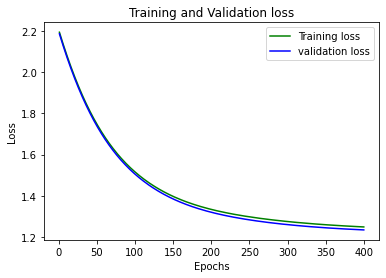

In [176]:
loss_train_SGD = Network_Classifier_SGD.history['loss']
loss_val_SGD = Network_Classifier_SGD.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train_SGD, 'g', label='Training loss')
plt.plot(epochs, loss_val_SGD, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

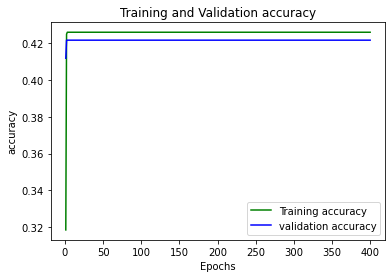

In [177]:
Acc_train_SGD = Network_Classifier_SGD.history['accuracy']
Acc_val_SGD = Network_Classifier_SGD.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train_SGD, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val_SGD, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Part 1.3 d - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [178]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

NN_model_Classifier_adagrad = Sequential()

# The Input Layer :
NN_model_Classifier_adagrad.add(Dense(128, kernel_initializer='normal',input_dim = X_Train_S.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier_adagrad.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier_adagrad.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier_adagrad.add(LeakyReLU(alpha=0.1))

NN_model_Classifier_adagrad.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier_adagrad.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier_adagrad.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_adagrad.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
NN_model_Classifier_adagrad.summary()

EPOCH=400
Network_Classifier_adagrad=NN_model_Classifier_adagrad.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 128)               1536      
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dense_90 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_91 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_92 (Dense)            (None, 9)               

### Part 1.3 e - Plot visuals as in Q3.C and share insights about difference observed in both the models.

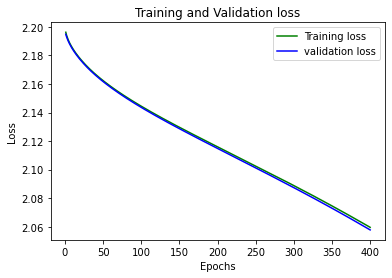

In [179]:
loss_train_adagrad = Network_Classifier_adagrad.history['loss']
loss_val_adagrad = Network_Classifier_adagrad.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train_adagrad, 'g', label='Training loss')
plt.plot(epochs, loss_val_adagrad, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

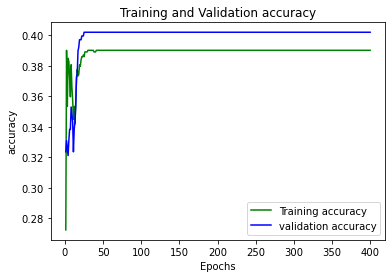

In [180]:
Acc_train_adagrad = Network_Classifier_adagrad.history['accuracy']
Acc_val_adagrad = Network_Classifier_adagrad.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train_adagrad, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val_adagrad, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [181]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

NN_model_Classifier_adam = Sequential()

# The Input Layer :
NN_model_Classifier_adam.add(Dense(128, kernel_initializer='normal',input_dim = X_Train_S.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier_adam.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier_adam.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier_adam.add(LeakyReLU(alpha=0.1))

NN_model_Classifier_adam.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier_adam.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier_adam.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier_adam.summary()

EPOCH=100
Network_Classifier_adam=NN_model_Classifier_adam.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 128)               1536      
                                                                 
 dense_94 (Dense)            (None, 64)                8256      
                                                                 
 dense_95 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_96 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_97 (Dense)            (None, 9)               

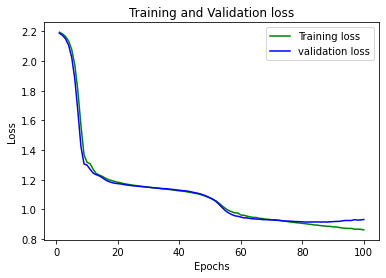

In [182]:
loss_train_adam = Network_Classifier_adam.history['loss']
loss_val_adam = Network_Classifier_adam.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train_adam, 'g', label='Training loss')
plt.plot(epochs, loss_val_adam, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

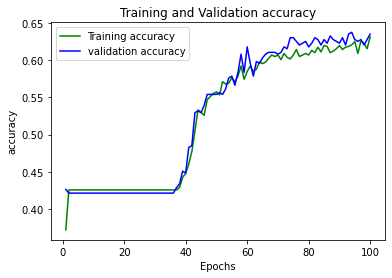

In [183]:
Acc_train_adam = Network_Classifier_adam.history['accuracy']
Acc_val_adam = Network_Classifier_adam.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train_adam, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val_adam, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1) Tried Different models which got 42% accuracy for SGD optimizer.

2) Adagrad optimizer model accuracy is again near 41%. 

3) The model is performing well with accuracy of 63.48% using Adam optimizer. 

4) The strength of data is haveing class range from 3-7.

5) The data is weighted heavily towards two class that i.e 5-6 which is covering 82% of target data because of that the accuracy is not improving much. We need the sampling or other strategy to deal with same. 

# PART 2

# DOMAIN: Autonomous Vehicles

# BUSINESS CONTEXT:
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest
to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character
arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

# DATA DESCRIPTION: 
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on
data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained
from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

### PROJECT OBJECTIVE: 
We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

### Part 2.1 a - Read the .h5 file and assign to a variable.

In [184]:
import h5py

SVHN = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')


In [185]:
SVHN

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

### Part 2.1 b - Print all the keys from the .h5 file.

In [186]:
def keys(SVHN):
    return [key for key in SVHN.keys()]

In [187]:
print(keys(SVHN))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### Part 2.1 c - Split the data into X_train, X_test, Y_train, Y_test

In [199]:
#Training Data

# splitting data to training and testing only as it is asked 

X_train = SVHN['X_train'][:]
y_train= SVHN['y_train'][:]

X_test= SVHN['X_test'][:]
y_test= SVHN['y_test'][:]
                
                
        

### Part 2.2 a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync..

In [189]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


### Part 2.2 b - Visualise first 10 images in train data and print its corresponding labels..

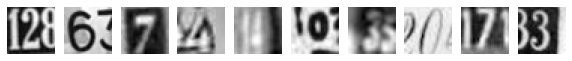

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [190]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### Part 2.2 c - Reshape all the images with appropriate shape update the data in same variable.

In [191]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

### Part 2.2 d - Normalise the images i.e. Normalise the pixel values.

In [192]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


### Part 2.2 e - Transform Labels into format acceptable by Neural Network

In [193]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



### Part 2.2 f - Print total Number of classes in the Dataset.

In [194]:
# no.of classes
no_classes = y_test.shape[1] 
print("The no. of classes in this dataset are:",no_classes)

The no. of classes in this dataset are: 10


### Part 2.3 a - Design a Neural Network to train a classifier.

In [195]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))
    return model

### Part 2.3 b - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [196]:
# build the model
model = nn_model()

# Compile model
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=2)

Epoch 1/100
210/210 - 2s - loss: 2.2950 - accuracy: 0.1114 - val_loss: 2.2340 - val_accuracy: 0.1492 - 2s/epoch - 8ms/step
Epoch 2/100
210/210 - 1s - loss: 1.9753 - accuracy: 0.2783 - val_loss: 1.6568 - val_accuracy: 0.4273 - 1s/epoch - 5ms/step
Epoch 3/100
210/210 - 1s - loss: 1.5443 - accuracy: 0.4704 - val_loss: 1.4025 - val_accuracy: 0.5357 - 1s/epoch - 5ms/step
Epoch 4/100
210/210 - 1s - loss: 1.3770 - accuracy: 0.5456 - val_loss: 1.3356 - val_accuracy: 0.5559 - 1s/epoch - 5ms/step
Epoch 5/100
210/210 - 1s - loss: 1.2614 - accuracy: 0.5914 - val_loss: 1.2349 - val_accuracy: 0.6083 - 1s/epoch - 5ms/step
Epoch 6/100
210/210 - 1s - loss: 1.1738 - accuracy: 0.6290 - val_loss: 1.1181 - val_accuracy: 0.6516 - 1s/epoch - 5ms/step
Epoch 7/100
210/210 - 1s - loss: 1.1385 - accuracy: 0.6428 - val_loss: 1.1034 - val_accuracy: 0.6584 - 1s/epoch - 5ms/step
Epoch 8/100
210/210 - 1s - loss: 1.1029 - accuracy: 0.6520 - val_loss: 1.0790 - val_accuracy: 0.6618 - 1s/epoch - 5ms/step
Epoch 9/100
210/

### Part 2.3 c - Evaluate performance of the model with appropriate metrics.

In [197]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6905147433280945
Accuracy: 0.8059999942779541


### Part 2.3 d - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

Text(0.5, 1.0, 'Training and validation loss')

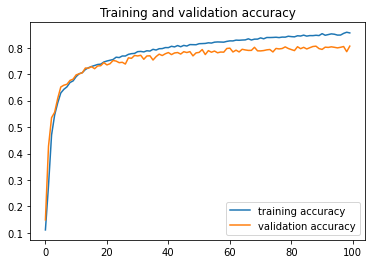

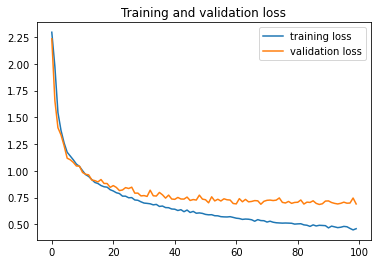

In [198]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

1) The Accuracy Here is ranging between 80-82%. There are 10 categorical classes in the dataset which represent digits from 0-9.

2) Tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.55 %.

3) Overfitting in data was obsered due to which we hace to cut the epochs to 100%. The losses is also increasing at some point. 